#### Import Libraries & Packages

In [1]:
# Basic Libraries
import os
import pandas as pd 
import numpy as np
import pandas_profiling as pp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from sklearn import preprocessing 

In [4]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")

In [5]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
print ("-" * 200)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Range

In [8]:
# Numerical
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
# Categorical
train_df.describe(include = ["O"])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Molson, Mr. Harry Markland",male,1601,G6,S
freq,1,577,7,4,644


#### Missing Value treatment

In [10]:
total =train_df.isnull().sum().sort_values(ascending=False)
percent = 100 * total / len (train_df)
missing_data = pd.concat([total,percent],axis = 1, keys = {"len","%missing"})
missing_data

,len,%missing
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467
Fare,0,0.000000
Ticket,0,0.000000
Parch,0,0.000000
SibSp,0,0.000000
Sex,0,0.000000
Name,0,0.000000
Pclass,0,0.000000


In [11]:
## therefore drop cabin since nothing can be done

#### Age

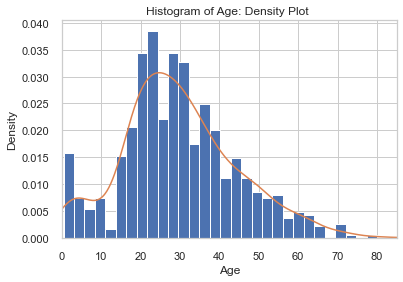

In [12]:
ax= train_df["Age"].hist(bins=30, density= True, stacked = True)
train_df["Age"].plot(kind="density")
# wrote labels
ax.set(xlabel="Age")
plt.xlim(0,85)
plt.title("Histogram of Age: Density Plot ")
plt.show()

In [13]:
## Age is rightly skewed

In [14]:
## nexxt missing is Embarked

In [15]:
train_df.Embarked.astype("category").value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

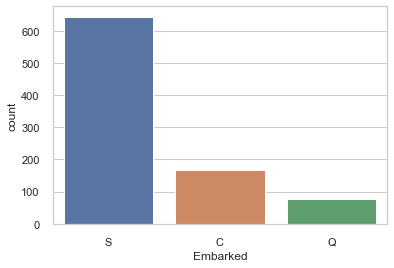

In [16]:
sns.countplot(x="Embarked", data=train_df)
#c- Cherbourg, q- queenstown, s-southampton

#### Imputation

In [17]:
train_data=train_df.copy()
## filling age
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace = True)

In [18]:
## filling embarked with southampton
train_data["Embarked"].fillna(train_df["Embarked"].value_counts().idxmax(), inplace=True)

In [19]:
## Dropping cabin since we do not require it and have max missing value
train_data.drop("Cabin", axis=1, inplace=True)

In [20]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [22]:
## Categorical variables treatment
## plcass has 0,1,2,3
training= pd.get_dummies(train_data,columns=["Pclass","Embarked", "Sex"])

In [23]:
training.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Sex_female', 'Sex_male'],
      dtype='object')

In [24]:
## extra columns since all the sex be concat in 01.
training.drop("Sex_female", axis=1, inplace = True)

In [25]:
## Not required
training.drop("PassengerId",axis=1, inplace =True)

In [26]:
## Not Required.. Think what outcome will you gather from Name??
training.drop("Name", axis=1,inplace=True)

In [27]:
training.drop("Ticket",axis=1, inplace = True)

In [28]:
final_train=training
final_train.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,1


#### Now since the train data is absolutely clear..We need to move to test data..

In [29]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [30]:
test_data=test_df.copy()

#### Imputation

In [31]:
test_data["Age"].fillna(test_df["Age"].median(skipna=True), inplace = True)

In [32]:
test_data["Embarked"].fillna(test_df["Embarked"].value_counts().idxmax(), inplace = True)

In [33]:
test_data["Fare"].fillna(test_df["Fare"].median(skipna=True), inplace = True)

In [34]:
## Dropping cabin since we do not require it and have max missing value
test_data.drop("Cabin", axis=1, inplace=True)

In [35]:
test_data.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [36]:
testing = pd.get_dummies(test_data, columns=["Pclass", "Embarked", "Sex"])

In [37]:
testing.head(5)

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,0,0,1,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1,0,0,1,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,0,1,0,0,1,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,0,0,1,0,0,1,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,0,0,1,0,0,1,1,0


In [38]:
testing.drop("Sex_female",axis=1, inplace = True)

In [39]:
testing.drop("Ticket",axis=1, inplace = True)

In [40]:
testing.drop("Name",axis=1, inplace = True)

In [41]:
testing.drop("PassengerId",axis=1, inplace = True)

In [42]:
final_test= testing

In [43]:
final_test.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,0,0,1,0,1,0,1
1,47.0,1,0,7.0000,0,0,1,0,0,1,0
2,62.0,0,0,9.6875,0,1,0,0,1,0,1
3,27.0,0,0,8.6625,0,0,1,0,0,1,1
4,22.0,1,1,12.2875,0,0,1,0,0,1,0


In [44]:
final_test.isnull().sum()

Age           0
SibSp         0
Parch         0
Fare          0
Pclass_1      0
Pclass_2      0
Pclass_3      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

#### Data Exploration

In [45]:
## Age

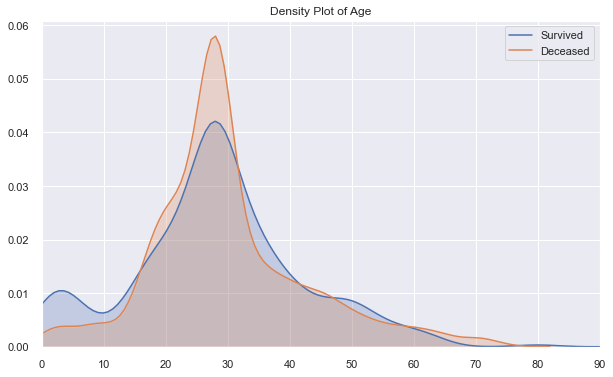

In [54]:
fig = plt.figure(figsize=(10,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("darkgrid")
sns.kdeplot(train_data["Age"][train_data.Survived == 1], ax = ax, shade=True)
sns.kdeplot(train_data["Age"][train_data.Survived == 0], ax = ax, shade=True)
plt.legend(["Survived", "Deceased"])
plt.title("Density Plot of Age")
plt.xlim(0,90)
plt.show()

#### Most of the childrens survived

<Figure size 432x288 with 0 Axes>

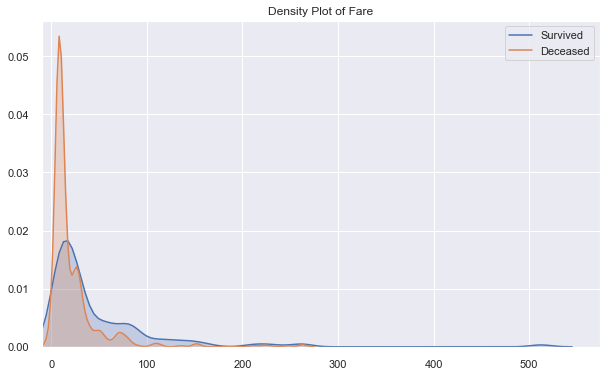

In [58]:
plt.clf()
fig = plt.figure(figsize=(10,6)) # define plot area
ax = fig.gca() # define axis 
sns.set_style("darkgrid")
sns.kdeplot(train_data["Fare"][train_data.Survived == 1], ax = ax, shade=True)
sns.kdeplot(train_data["Fare"][train_data.Survived == 0], ax = ax, shade=True)
plt.legend(["Survived", "Deceased"])
plt.title("Density Plot of Fare")
plt.xlim(-10,)
plt.show()

In [59]:
####people who paid less fare likely to survive more

Passenger Class

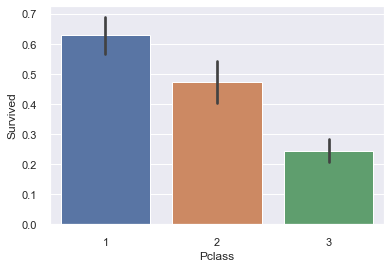

In [61]:
sns.barplot(x = 'Pclass', y = 'Survived', data = train_data)

Sex

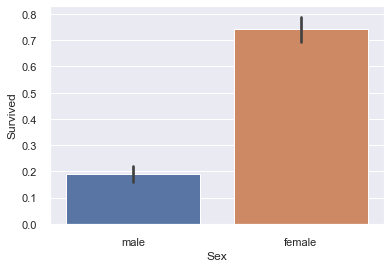

In [62]:
sns.barplot('Sex', 'Survived', data=train_data)
plt.show()

#### Logistic Regression And Results

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

In [64]:
# Create X's and Y 


X = final_train.drop("Survived", axis=1)

y = final_train['Survived']


In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [66]:
from sklearn.linear_model import LogisticRegression

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [67]:
y_pred_proba = logreg.predict_proba(X_test)[:, 1] #Will give us the probability values 

In [68]:
logreg.coef_

array([[-0.04121224, -0.38744975, -0.01600591,  0.00331134,  1.44787458,
         0.58912999, -0.5912264 ,  0.57522524,  0.59849947,  0.27205345,
        -2.6412667 ]])

In [69]:
coeff_df = pd.DataFrame(final_train.columns.delete(0))
coeff_df.columns = ['Feature']

coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

# Positive Coefficeints increases the log odds of response right - so 


,Feature,Correlation
4,Pclass_1,1.447875
8,Embarked_Q,0.598499
5,Pclass_2,0.589130
7,Embarked_C,0.575225
9,Embarked_S,0.272053
3,Fare,0.003311
2,Parch,-0.016006
0,Age,-0.041212
1,SibSp,-0.387450
6,Pclass_3,-0.591226


#### Metrics

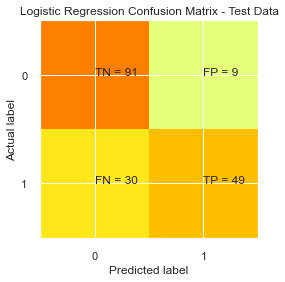

In [70]:
#Confusion Matrix 

cm = confusion_matrix(y_test, y_pred)

plt.imshow(cm, cmap=plt.cm.Wistia)
classNames = ['0','1']
plt.title('Logistic Regression Confusion Matrix - Test Data')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.rcParams["axes.grid"] = False
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=0)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [71]:

y_pred_proba = logreg.predict_proba(X_test)[:, 1]

[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))
print(logreg.__class__.__name__+" auc is %2.3f" % auc(fpr, tpr))

Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.510
LogisticRegression auc is 0.829


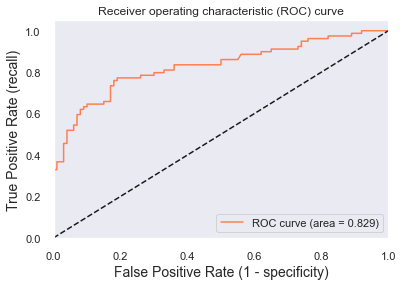

In [72]:
plt.figure()
plt.plot(fpr, tpr, color='coral', label='ROC curve (area = %0.3f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=14)
plt.ylabel('True Positive Rate (recall)', fontsize=14)
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()